In [3]:
# Task 1
import pandas as pd

def calculate_loan_repayment_percentage(file_path):
    df = pd.read_csv(file_path)

    # Extract numeric part from 'term' and convert to numeric
    df['term'] = df['term'].str.extract('(\d+)', expand=False).astype(float)

    # Calculate months remaining for each loan
    df['months_remaining'] = df['term'] - ((pd.to_datetime(df['last_payment_date']) - pd.to_datetime(df['issue_date'])).dt.days / 30)

    df['expected_payments'] = df['loan_amount'] * ((df['int_rate'] / 100) * (df['term'] / 12))

    total_expected_payments = df['expected_payments'].sum()

    total_payments_received = df['total_payment'].sum()

    # Calculate total amount expected to be recovered in the next 6 months
    total_recovery_6_months = df[df['months_remaining'] >= 6]['expected_payments'].sum()

    # Calculate the percentage of the total amount recovered in the next 6 months
    percentage_recovery_6_months = (total_recovery_6_months / total_expected_payments) * 100

    print(f"Total Expected Payments: {total_expected_payments:.2f}")
    print(f"Total Payments Received: {total_payments_received:.2f}")
    print(f"Total Recovery in the Next 6 Months: {total_recovery_6_months:.2f}")
    print(f"Percentage of Total Recovery in the Next 6 Months: {percentage_recovery_6_months:.2f}%")

    loan_repayment_percentage = (total_payments_received / total_expected_payments) * 100

    return loan_repayment_percentage

if __name__ == "__main__":
    file_path = 'C:/Users/admin/EDA - Customer Loans/final_data.csv'
    repayment_percentage = calculate_loan_repayment_percentage(file_path)
    print(f"Loan Repayment Percentage: {repayment_percentage:.2f}%")


Total Expected Payments: 247474.12
Total Payments Received: 3046388.68
Total Recovery in the Next 6 Months: 215542.73
Percentage of Total Recovery in the Next 6 Months: 87.10%
Loan Repayment Percentage: 1230.99%


In [15]:
# Task 2
import pandas as pd

def calculate_loss_percentage(file_path):
    df = pd.read_csv(file_path)

    charged_off_loans = df[df['loan_status'] == 'Charged Off']

    # Calculate total amount paid towards charged-off loans
    total_amount_paid_charged_off = charged_off_loans['total_payment'].sum()

    # Calculate total charged-off loans
    total_charged_off_loans = charged_off_loans.shape[0]

    # Calculate the percentage of charged-off loans historically
    percentage_charged_off_loans = (total_charged_off_loans / df.shape[0]) * 100

    print(f"Total Charged Off Loans: {total_charged_off_loans}")
    print(f"Percentage of Charged Off Loans Historically: {percentage_charged_off_loans:.2f}%")
    print(f"Total Amount Paid Towards Charged Off Loans: ${total_amount_paid_charged_off:.2f}")

    return total_charged_off_loans, percentage_charged_off_loans, total_amount_paid_charged_off

if __name__ == "__main__":
    file_path = 'C:/Users/admin/EDA - Customer Loans/final_data.csv'
    calculate_loss_percentage(file_path)


Total Charged Off Loans: 5571
Percentage of Charged Off Loans Historically: 10.27%
Total Amount Paid Towards Charged Off Loans: $250425.03


Total Loss in Revenue: $-198589.75


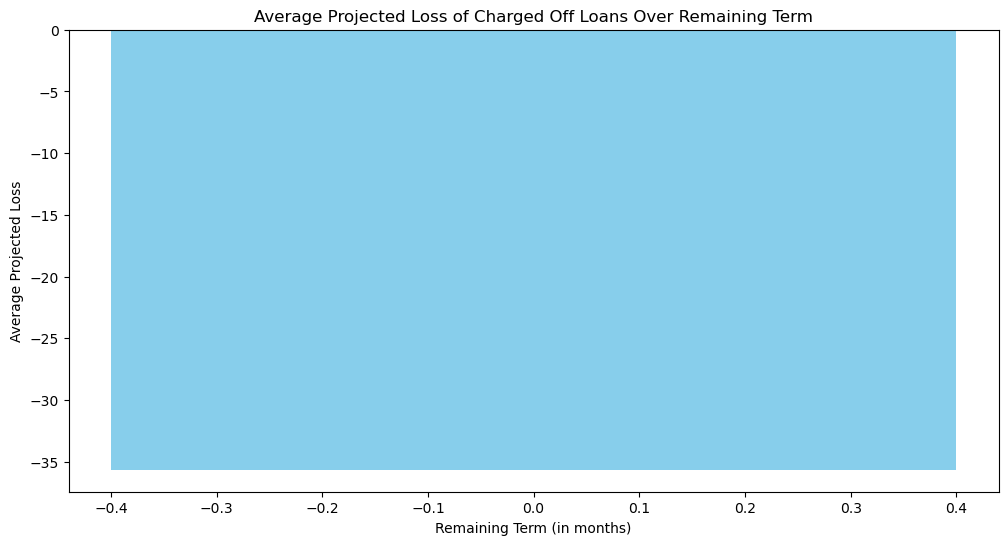

In [41]:
#task 3
import pandas as pd
import matplotlib.pyplot as plt

def extract_months(df, column):
    df[column] = df[column].str.extract('(\d+)', expand=False).astype(float)
    return df

def calculate_projected_loss_summary(file_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Convert 'last_payment_date' and 'issue_date' to datetime format
    date_columns = ['last_payment_date', 'issue_date']
    df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x, errors='coerce', format='%b-%y'))

    # Use extract_months to convert 'term' column to numeric
    df = extract_months(df, 'term')

    charged_off_loans = df[df['loan_status'] == 'Charged Off'].copy()

    # Calculate the remaining term for each loan and handle non-finite values
    charged_off_loans['remaining_term'] = (charged_off_loans['term'] -
                                            (charged_off_loans['last_payment_date'] - charged_off_loans['issue_date']).dt.days // 30)
    charged_off_loans['remaining_term'] = charged_off_loans['remaining_term'].fillna(0).astype(int)

    # Calculate the projected loss for each loan
    charged_off_loans['projected_loss'] = charged_off_loans['loan_amount'] - charged_off_loans['total_payment']

    # Group by remaining term and calculate average projected loss
    summary_data = charged_off_loans.groupby('remaining_term')['projected_loss'].mean().reset_index()

    # Calculate and present the total loss in revenue
    total_loss_in_revenue = charged_off_loans['loan_amount'].sum() - charged_off_loans['total_payment'].sum()
    print(f"Total Loss in Revenue: ${total_loss_in_revenue:.2f}")


    # Visualize the summary using a bar chart for projected loss
    plt.figure(figsize=(12, 6))
    plt.bar(summary_data['remaining_term'], summary_data['projected_loss'], color='skyblue')
    plt.xlabel('Remaining Term (in months)')
    plt.ylabel('Average Projected Loss')
    plt.title('Average Projected Loss of Charged Off Loans Over Remaining Term')
    plt.show()

if __name__ == "__main__":
    file_path = 'C:/Users/admin/EDA - Customer Loans/final_data.csv'
    calculate_projected_loss_summary(file_path)


In [42]:
#task 4

import pandas as pd
import matplotlib.pyplot as plt

def extract_months(df, column):
    df[column] = df[column].str.extract('(\d+)', expand=False).astype(float)
    return df

def calculate_risk_metrics(file_path):
    df = pd.read_csv(file_path)

    # Convert 'last_payment_date' and 'issue_date' to datetime format
    date_columns = ['last_payment_date', 'issue_date']
    df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x, errors='coerce', format='%b-%y'))

    # Use extract_months to convert 'term' column to numeric
    df = extract_months(df, 'term')

    # Identify customers currently behind on payments (Late 31-120 days)
    late_customers = df[df['loan_status'] == 'Late (31-120 days)'].copy()

    # Task 1: Calculate the percentage of customers in the "Late (31-120 days)" bracket
    percentage_late_customers = (len(late_customers) / len(df)) * 100
    print(f"Percentage of customers currently late on payments: {percentage_late_customers:.2f}%")

    # Task 2: Calculate the total number of customers in the "Late (31-120 days)" bracket
    total_late_customers = len(late_customers)
    print(f"Total number of customers currently late on payments: {total_late_customers}")

    # Task 3: Calculate the loss if the status of these customers was changed to Charged Off
    total_loss_if_charged_off = late_customers['loan_amount'].sum() - late_customers['total_payment'].sum()
    print(f"Total loss if status changed to Charged Off: ${total_loss_if_charged_off:.2f}")

    # Task 4: Calculate the projected loss of these loans if the customer were to finish the full loan term
    late_customers['remaining_term'] = late_customers['term'] - (
            (late_customers['last_payment_date'] - late_customers['issue_date']).dt.days // 30)
    late_customers['remaining_term'] = late_customers['remaining_term'].fillna(0).astype(int)
    projected_loss_if_finish_term = late_customers['loan_amount'].sum() - late_customers['total_payment'].sum()
    print(f"Projected loss if customers finish full loan term: ${projected_loss_if_finish_term:.2f}")

    # Task 5: Calculate the percentage of total expected revenue represented by late customers if converted to Charged Off
    total_expected_payments = late_customers['loan_amount'].sum()
    total_payments_received = late_customers['total_payment'].sum()
    percentage_of_expected_revenue = (total_payments_received / total_expected_payments) * 100
    print(f"Percentage of total expected revenue represented by late customers: {percentage_of_expected_revenue:.2f}%")

if __name__ == "__main__":
    file_path = 'C:/Users/admin/EDA - Customer Loans/final_data.csv'
    calculate_risk_metrics(file_path)


Percentage of customers currently late on payments: 1.07%
Total number of customers currently late on payments: 580
Total loss if status changed to Charged Off: $-25435.45
Projected loss if customers finish full loan term: $-25435.45
Percentage of total expected revenue represented by late customers: 564.40%


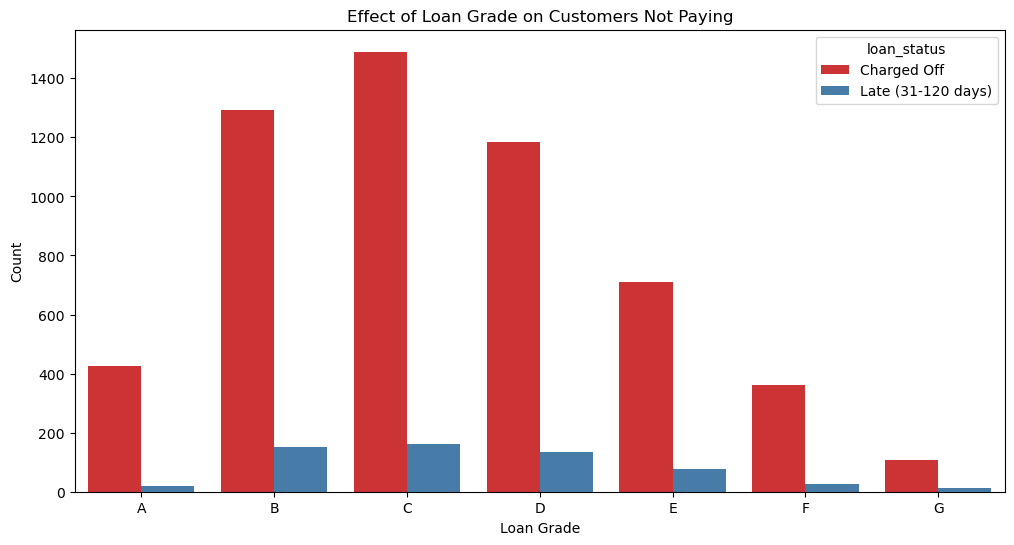

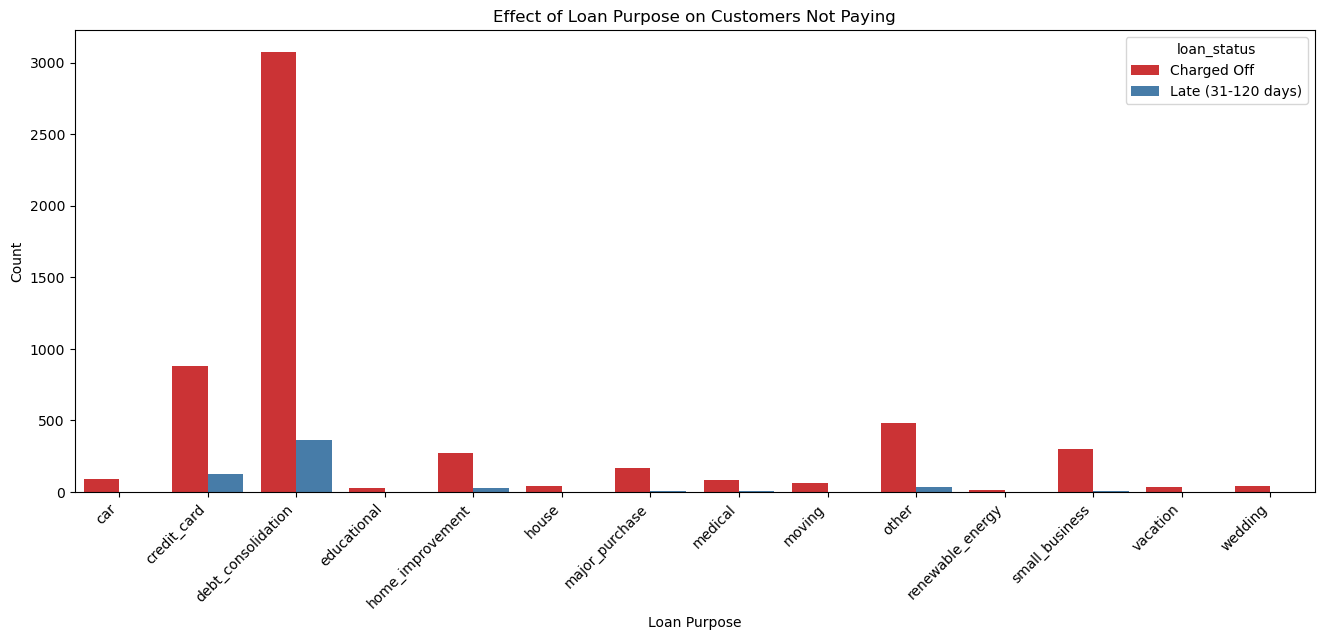

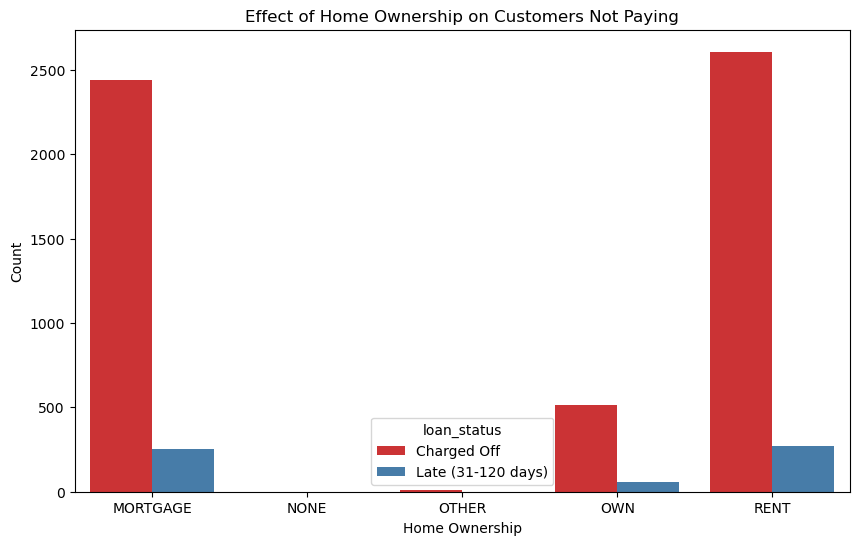

In [44]:
#task 5

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def extract_months(df, column):
    df[column] = df[column].str.extract('(\d+)', expand=False).astype(float)
    return df

def analyze_loan_indicators(file_path):
    df = pd.read_csv(file_path)

    # Convert 'last_payment_date' and 'issue_date' to datetime format
    date_columns = ['last_payment_date', 'issue_date']
    df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x, errors='coerce', format='%b-%y'))

    # Use extract_months to convert 'term' column to numeric
    df = extract_months(df, 'term')

    # Identify a subset of users who have already stopped paying or are currently behind on payments
    late_customers = df[df['loan_status'].isin(['Charged Off', 'Late (31-120 days)'])].copy()

    custom_palette = sns.color_palette("Set1")

    # Visualize the effect of loan grade on customers not paying
    plt.figure(figsize=(12, 6))
    sns.countplot(x='grade', hue='loan_status', data=late_customers, order=sorted(df['grade'].unique()), palette=custom_palette)
    plt.title('Effect of Loan Grade on Customers Not Paying')
    plt.xlabel('Loan Grade')
    plt.ylabel('Count')
    plt.show()

    # Visualize the effect of loan purpose on customers not paying
    plt.figure(figsize=(16, 6))
    sns.countplot(x='purpose', hue='loan_status', data=late_customers, order=sorted(df['purpose'].unique()), palette=custom_palette)
    plt.title('Effect of Loan Purpose on Customers Not Paying')
    plt.xlabel('Loan Purpose')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Visualize the effect of home ownership on customers not paying
    plt.figure(figsize=(10, 6))
    sns.countplot(x='home_ownership', hue='loan_status', data=late_customers, order=sorted(df['home_ownership'].unique()), palette=custom_palette)
    plt.title('Effect of Home Ownership on Customers Not Paying')
    plt.xlabel('Home Ownership')
    plt.ylabel('Count')
    plt.show()

if __name__ == "__main__":
    file_path = 'C:/Users/admin/EDA - Customer Loans/final_data.csv'
    analyze_loan_indicators(file_path)
